In [2]:
# On commence par importer les bibliothèques qui vont nous servir.
import numpy as np
import scipy.io as sp
import matplotlib.pyplot as plt

In [3]:
# on charge notre dataset (les features X ainsi que les labels y : y vrai)
# nous n'utiliserons pas les y pour le non supervisé mais simplement pour remédier au déséquilibre de classe)

dataSet = sp.loadmat('breastw.mat') 
print(type(dataSet))

<class 'dict'>


La classe dictionnaire suit le modèle suivant :
                    'key' : 'value' ~= mot : définition
Il faut maintenant identifier les features et les labels.

In [4]:
# On extrait les données du champ 'X' du dictionnaire
X = dataSet['X'] 
# on regarde la taille de la matrice
np.shape(X) 


(683, 9)

In [5]:
# on affiche les données
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


On a donc 683 observations avec 9 features (caractéristiques). Les caractéristques varient entre 1 et 10.

In [6]:
# on extrait les données du champ 'y'
label = dataSet['y'] 
# on regarde la taille du vecteur
np.shape(label)


(683, 1)

In [7]:
# on affiche les données
print(label)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]


On retrouve bien nos 683 observations affectées soit à la claase 0 : bénine soit la classe 1 : maline. 

In [8]:
import pandas as pd
dataset_df = pd.DataFrame(np.hstack((dataSet['X'], dataSet['y'])))
dataset_df.head

<bound method NDFrame.head of      0   1   2  3  4   5   6   7  8  9
0    5   1   1  1  2   1   3   1  1  0
1    5   4   4  5  7  10   3   2  1  0
2    3   1   1  1  2   2   3   1  1  0
3    6   8   8  1  3   4   3   7  1  0
4    4   1   1  3  2   1   3   1  1  0
..  ..  ..  .. .. ..  ..  ..  .. .. ..
678  3   1   1  1  3   2   1   1  1  0
679  2   1   1  1  2   1   1   1  1  0
680  5  10  10  3  7   3   8  10  2  1
681  4   8   6  4  3   4  10   6  1  1
682  4   8   8  5  4   5  10   4  1  1

[683 rows x 10 columns]>

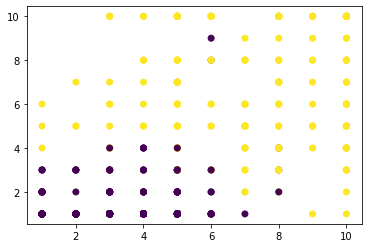

In [9]:
# On peut également afficher nos données dans un graphique
plt.scatter(X[:,0], X[: , 1], c=label , alpha=1)

Comme on dispose de 9 caractéristiques il va être nécessaire d'appliquer une méthode de réduction de dimension non seulement pour accélérer l'apprentissage de la machine et lutter contre le fléau de dimension (overfitting lié à un surplus de dimension) mais aussi pour permettre une visualiation du dataset et des résultats en 2D voire 3D de manière général sans prendre des caractéristiques en particulier.

In [10]:
# argwhere(condition) renvoie les indices (sous forme d'une liste) pour lesquels la condition est vérifiée
malignIdx = np.argwhere(label == 1)
benignIdx = np.argwhere(label == 0)
#  On dénombre le nombre d'observations bénines et malines. 
# la fonction len() renvoie la longueur d'un vecteur
print("Maline :",len(malignIdx)) 
print("Bénine :",len(benignIdx))

Maline : 239
Bénine : 444


On remarque donc que les deux classes ne sont pas équilibrées. Si on applique des algortihmes au dataset, les résultats obtenues ne seront pas optimaux à cause du déséquilibre des classes. Pour y remédier on pourra employer, par exempl, la méthode cross-validation. 

Cela permet de surmonter le problème de maximisation des sets d'entrainement et de test, puisque l'ensemble du data set va servir à la fois au test et au train, itérativement. Le nombre d'itération effectué dépend directement du nombre de partition du dataset (sachant qu'une observatio  ne peut appartenir qu'à 1 seule partition).


On commence par définir notre premier modèle : le modèle de clustering  KMeans 

19323.173817064977

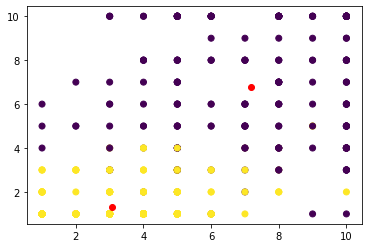

In [23]:
from sklearn.cluster import KMeans
# on définit notre Kmeans avec n_clusters, le nombre de cluster et de centroïdes associés à former, 
# n_init le nombre d'éxécution de l'algorithme pour trouver l'initialisation la plus optimale
# max_iter le nombre d'itération de l'algorithme pour 1 éxécution
# init : la méthode d'initialisation employée pour placer les centroïdes des clusters
# De base il s'agit de Kmeans ++ qui place les controïdes sur des points du dataset éloignés les uns des autres -> pour favoriser la convergence
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model = KMeans(n_clusters = 2, init ='k-means++', n_init = 10, max_iter = 300)
# La méthode .fit() exécute le modèle sur les features
model.fit(X) 
# La méthode .predict() permet de prédire pour chaque échantillon/observation son cluster d'appartenance et donc le centroïde associé
model.predict(X)
plt.scatter(X[:,0], X[: , 1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r')
model.inertia_

Pour optimiser l'algortihme, il faut trouver les bons hyperparamètres (paramètres qu'il faut fournir au modèle). le paramètre principal de Kmeans est le nombre de cluster K. Il existe une méthode qui permet de déterminer le nombre adéquat de cluster associé au dataset. il s'agit de la méthode du coude qui consiste à tracer l'évolution du coût du modèle (l'inertie ou fonction coût) en fonction du nombre de cluster.  La détection d'une zone de "coude" correspond à la minimisation de la fonction coût et donc au choix de K le plus approprié.

In [12]:
# Création d'une liste pour contenir les coûts du modèle pour différent k
inertia = []
# plage de nb de cluster à tester
K_range = range(1,20)
# Ajout du coût de chaque modèle Kmeans pour le paramètre K dans la liste inertia
for k in K_range:
    model = KMeans(n_clusters =k).fit(X)
    inertia.append(model.inertia_)

(1.0, 20.0)

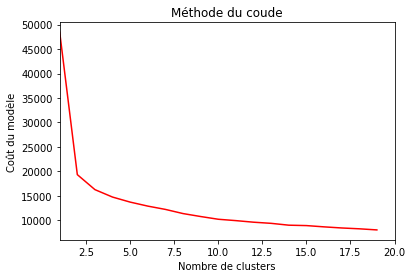

In [13]:
# On trace le graphique de la méthode du coude càd le coût de chaque modèle selon K
plt.plot(K_range, inertia, 'r')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle')
plt.title('Méthode du coude')
plt.xlim(1,20)


On constate que notre zone de coude se situe entre k = 2 et 3. Et plus précisément elle commence vers 2


Réduction de dimension  (2 fonctions : visualisation de donnée et compression de donnée)
    -> réduit la complexité superflue d'un datset en projetant ses données dans un espace de plus petite dimension (moins de variables)
On pourra recourir à la méthode Analyse en composante principale.
Il existe toutefois une configuration optimale du nombre de dimension pour optimiser les modèles employés : il faut conserver 95 - 99% de la variance. Pour cela on peux tracer le graphiuqe ...

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
x_pca = pca.fit_transform(X)
# explained_variance_ratio indique le % de variance préservé par chaque composante
pca.explained_variance_ratio_

array([0.69050756, 0.07195066, 0.06055921, 0.04442012, 0.03900513,
       0.03443899, 0.02529478, 0.02246508, 0.01135845])

On constate que la caractéristique 1 contribue à 69%, la 2ème à 7% la 3ème à 6% 4ème:4% 5ème:4% 6ème 3% 7ème 3% 8ème 2% et 9ème à 1%

Text(0.5, 1.0, 'Evolution de la variance du dataset en fonction du nombre cumulé de caractéristique')

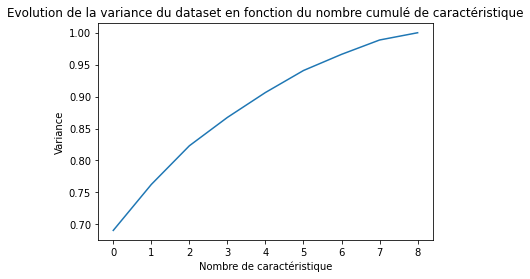

In [15]:
# cumsum permet de faire la somme cumulée
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de caractéristique')
plt.ylabel('Variance')
plt.title('Evolution de la variance du dataset en fonction du nombre cumulé de caractéristique')

In [16]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.99)

8

In [17]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)

6

Si on veut conserver entre 95 et 99% de la variance il faut garder 6 à 8 composantes.

Text(0, 0.5, 'second principal component')

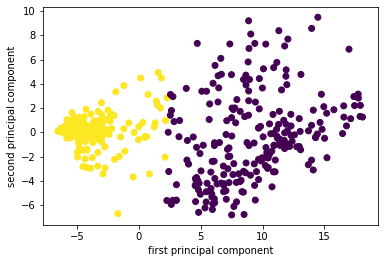

In [28]:
pca = PCA(n_components=2)
# on applique le modèle de reduction de dimension à nos caractéristiques.
x_pca = pca.fit_transform(X)
# on visualise notre dataset en dimension 2
plt.scatter(x_pca[:,0], x_pca[: , 1],c=model.predict(X))
plt.xlabel('first principal component')
plt.ylabel('second principal component')

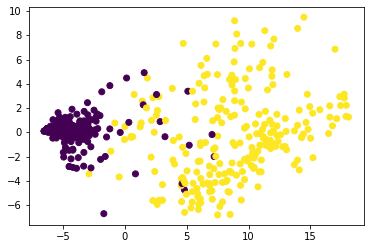

In [29]:
plt.scatter(x_pca[:,0], x_pca[: , 1], c=label)


C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\leo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


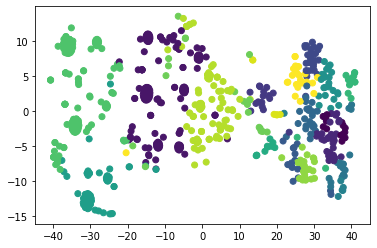

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,init='pca')
x_tsne = tsne.fit_transform(X)
plt.scatter(x_tsne[:,0], x_tsne[: , 1], c=model.predict(X) )

la représentation change à chaque run !!!!!